<a href="https://colab.research.google.com/github/ViktorHexCore/R_CEB/blob/main/R_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install.packages("googledrive")
# library("googledrive")
# system('add-apt-repository ppa:git-core/ppa')
# system('apt-get update')
# system("apt-get install git-dev")
# !git --version

In [ ]:
# install.packages("R.utils")
library("R.utils")

In [ ]:
download.file("https://raw.githubusercontent.com/guyz/twitter-sentiment-dataset/master/corpus.csv", 
              "corpus.csv")
# gunzip('corpus.csv.gz')

In [ ]:
R.version.string

[1] "R version 4.2.1 (2022-06-23)"

# **A). From Autism-Adolescent-Data.csv and luekemiaData.csv data, complete the below tasks: (10 pts.)** 

## Import Autism-Adolescent-Data.csv

In [ ]:
# import autismData
autismData <- read.csv("Autism-Adolescent-Data.csv")

In [ ]:
head(autismData, 5)

,A1.Score,A2.Score,A3.Score,A4.Score,A5.Score,A6.Score,A7.Score,A8.Score,A9.Score,A10.Score,age,gender,jundice,austim,used.app.before,result,Class.ASD
,<int>,<int>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
1,0,0,0,1,1,1,1,1,1,0,15,m,yes,yes,no,6,NO
2,0,0,0,0,0,0,0,0,1,1,15,m,no,no,no,2,NO
3,0,0,0,0,0,0,0,0,1,1,12,f,no,no,no,2,NO
4,0,1,1,1,1,1,0,1,1,0,14,f,no,no,no,7,YES
5,1,1,1,1,1,1,1,0,0,0,16,f,no,no,no,7,YES


In [ ]:
summary(autismData)

**1. Data management (Preparing, Cleansing, Imputation, etc.)**

In [ ]:
# find na value
sapply(autismData, function(x) sum(is.na(x)))

A1.Score        A2.Score        A3.Score        A4.Score        A5.Score 
              0               0               0               0               0 
       A6.Score        A7.Score        A8.Score        A9.Score       A10.Score 
              0               0               0               0               0 
            age          gender         jundice          austim used.app.before 
              0               0               0               0               0 
         result       Class.ASD 
              0               0

**2. Build a classifier by using SVM, NN, and kNN**

In [ ]:
# install.packages('e1071')
library(e1071)
library(MASS)

In [ ]:
allData <- autismData

In [ ]:
# train test split model
set.seed(111)
ind <- sample(2, nrow(allData), replace = TRUE, prob = c(0.7, 0.3))
trainData <- allData[ind == 1, ]
testData <- allData[ind == 2, ]

## 3. Model’s parameters tuning (if needs)
4. Build a final model
5. Model evaluation
6. Results discussion (For example, Which method(model) should 
you choose? Why? Please explain as much as possible)

In [ ]:
# tuning
tune <- tune.svm(austim~., data=trainData, gamma=10^(-6:-1), cost=10^(1:4))
summary(tune)

In [ ]:
# model <- svm(austim~., data=trainData, method="C-classification", kernel="linear", probability=T, 
# gamma=0.1, cost=10)
# prediction <-predict(model, testData, probability=T)
# table(testData$austim, prediction)
# plot(model, allData)

ERROR: ignored

In [ ]:
3. Model’s parameters tuning (if needs)
4. Build a final model
5. Model evaluation
6. Results discussion (For example, Which method(model) should 
you choose? Why? Please explain as much as possible)



# B Describe all allalalalal

## C). (15 pts.) Aj. Ake wants to plan the daily nutrient intake when on a tight budget. The doctor 
**recommended the daily nutrients that Aj. Akeshould get:**
- Calories per day at least 500 kcal.
- At least 6 g. of protein.
- Carbohydrate at least 10 g.
- Fat at least 8 g.


show equation  
400 x1 + 200 x2 + 150 x3 + 500 x4 >= 500 kcal

3 x1 + 2 x2 + 0 x3 + 0 x4 >= 6 g protien

2 x1 + 2 x2 + 4 x3 + 4 x4 >= 10 g carb

2 x1 + 4 x2 + 1 x3 + 5 x4 >= 8 g fat

objective function to get lowest price bath  
500 x1 + 200 x2 + 300 x3 + 800 x4

In [ ]:
# install.packages('lpSolve')
library(lpSolve)

In [ ]:
f.obj <- c(500, 200, 300, 800)

In [ ]:
f.con <- matrix(c(400, 200, 150, 500,
3, 2, 0, 0,
2, 2, 4, 4,
2, 4, 1, 5), nrow = 4, byrow = TRUE)

In [ ]:
f.dir <-c(">=",
">=",
">=",
">=")

In [ ]:
f.rhs <-c(500,
6,
10,
8)

In [ ]:
lp("min", f.obj, f.con, f.dir, f.rhs)

Success: the objective function is 900 

In [ ]:
lp("min", f.obj, f.con, f.dir, f.rhs)$solution

[1] 0 3 1 0

## **D). (10 pts.) you are a data scientist and your boss asks you to train a deep learning model by using an image data augmentation technique.Please create more 21 images from the original three images(xray01.jpg, x-ray02.jpg, x-ray03.jpg) by using R.**

In [ ]:
# system('add-apt-repository -y ppa:cran/imagemagick')
# system('apt-get update')
# system("apt-get install libmagick++-dev")
# install.packages("magick")
library(magick)
str(magick::magick_config())


format,width,height,colorspace,matte,filesize,density
<chr>,<int>,<int>,<chr>,<lgl>,<int>,<chr>
JPEG,203,249,sRGB,FALSE,4439,72x72


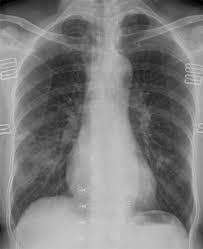

# A data frame: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 JPEG     203    249 sRGB       FALSE     4439 72x72  


In [ ]:
xray1 <- image_read("x-ray01.jpg")
image_info(xray1)
print(xray1)

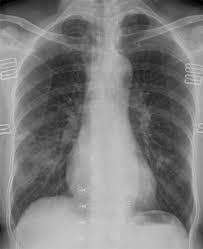

# A data frame: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 JPEG     203    249 sRGB       FALSE        0 72x72  

In [ ]:
image_trim(xray1)

In [ ]:
xrayAug = image_crop(xray1,"100x200+100")

xrayAug = image_scale(xray1,"500")

xrayAug = image_scale(xray1,"x150")

xrayAug = image_rotate(xray1, 30)

xrayAug = image_rotate(xray1, 270)

xrayAug = image_flip(xray1)

xrayAug = image_modulate(xray1, brightness = 150, saturation = 111, hue = 77)

# xrayAug = image_fill(xray1, "blue", point = "+100+200", fuzz = 10)

image_write(xrayAug, path = "show.jpg", format = "jpeg", quality = 75)

# repeat it with another images

ERROR: ignored